Rafael Beltrán Hernández 

# Retroexcavadora

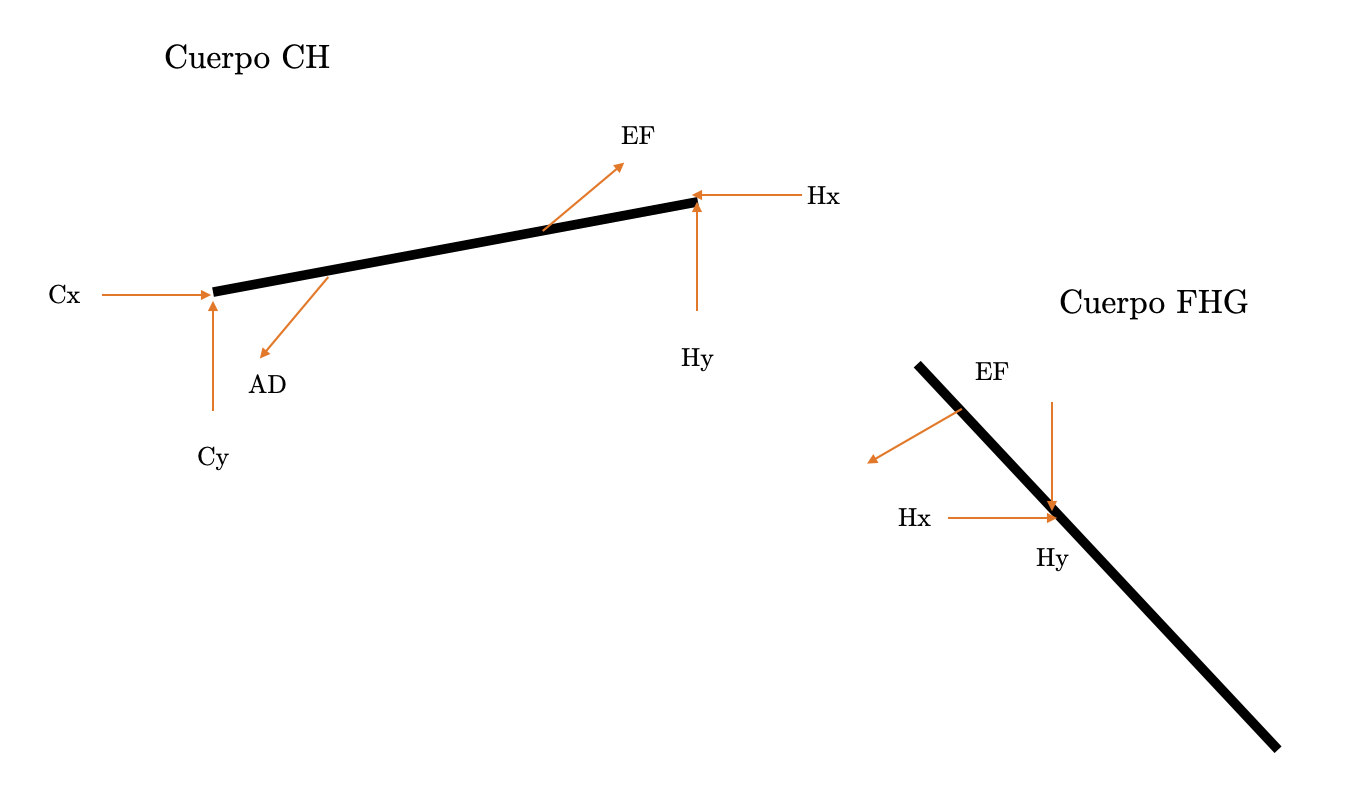

In [1]:
from IPython.display import Image
Image(filename='Imagenes Tareas/DCL_1.png')

# Countershaft

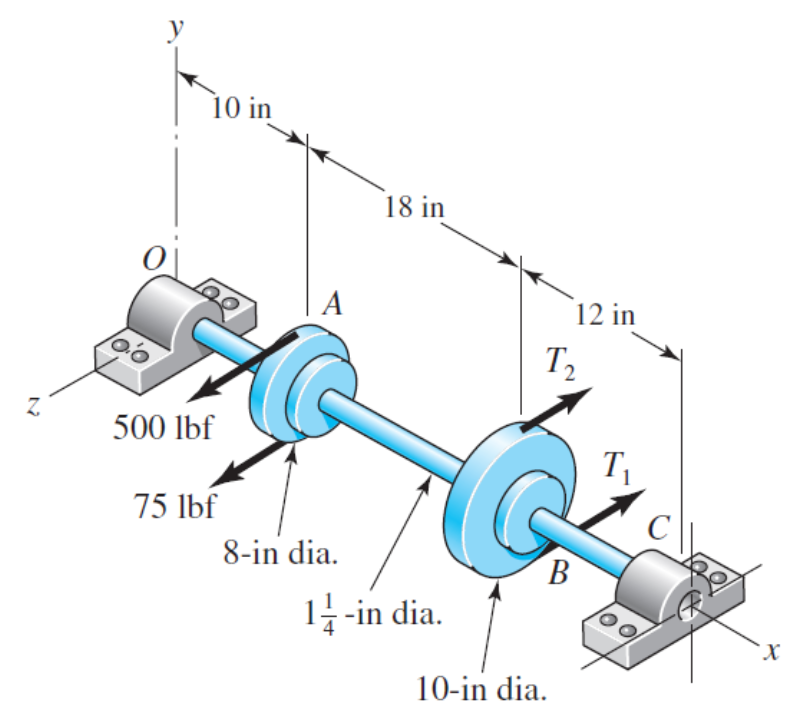

In [2]:
Image(filename = 'Imagenes Tareas/Crankshaft.png')

En primer lugar se establecen las ecuaciones que definen el sistema. Las reacciones de momentos en las chumaceras son cero, puesto que hay 2. La tension equivalente en $B$ se puede expresar como $T_b = T_2 + 0.15 T_2 = 1.15 T_2$ y $T_a = 575$ lb 

Nuestra primera ecuacion de equilibrio es $\sum M_{c_y} = 0$:

\begin{equation}
    0= -10T_a + 28(1.15T_2) - 40C_z
\end{equation}

Los momentos totales a lo largo del eje x son igualados a cero $\sum M_x =0$:

\begin{equation}
    8(500-75) = 10(0.85T_2)
\end{equation}

Por último, la sumatoria de fuerzas en el eje $z$ es igual a cero $\sum F_z = 0$

\begin{equation}
    O_z + T_a - 1.15T_2 + C_z = 0
\end{equation}

A continuacion se realizara el procedimiento para encontrar las reacciones

In [3]:
import sympy as sp
# Fuerzas Conocidas
Ta = 570
# Incógnitas
T2, Oz , Cz = sp.symbols('T2 Oz Cz')
# Declaración de Ecuaciones (en sympy las ecuaciones se declaran igualadas a cero):
momentos_x = 10*0.85*T2 - 3400
fuerzas_z = Oz + Cz + Ta -1.15*T2
momentos_Oy = -10*Ta + 28*1.15*T2 - 40*Cz

sol = sp.nsolve((momentos_x,fuerzas_z,momentos_Oy),(T2,Oz,Cz),(1,1,1))

print('Las tensiones de la polea B son',sol[0],'y',sol[0]*0.15,'lb')
print('           ')
print('Las reacciones en las chumaceras son de',sol[1],'y',sol[2],'lb')

Las tensiones de la polea B son 400.000000000000 y 60.0000000000000 lb
           
Las reacciones en las chumaceras son de -289.500000000000 y 179.500000000000 lb


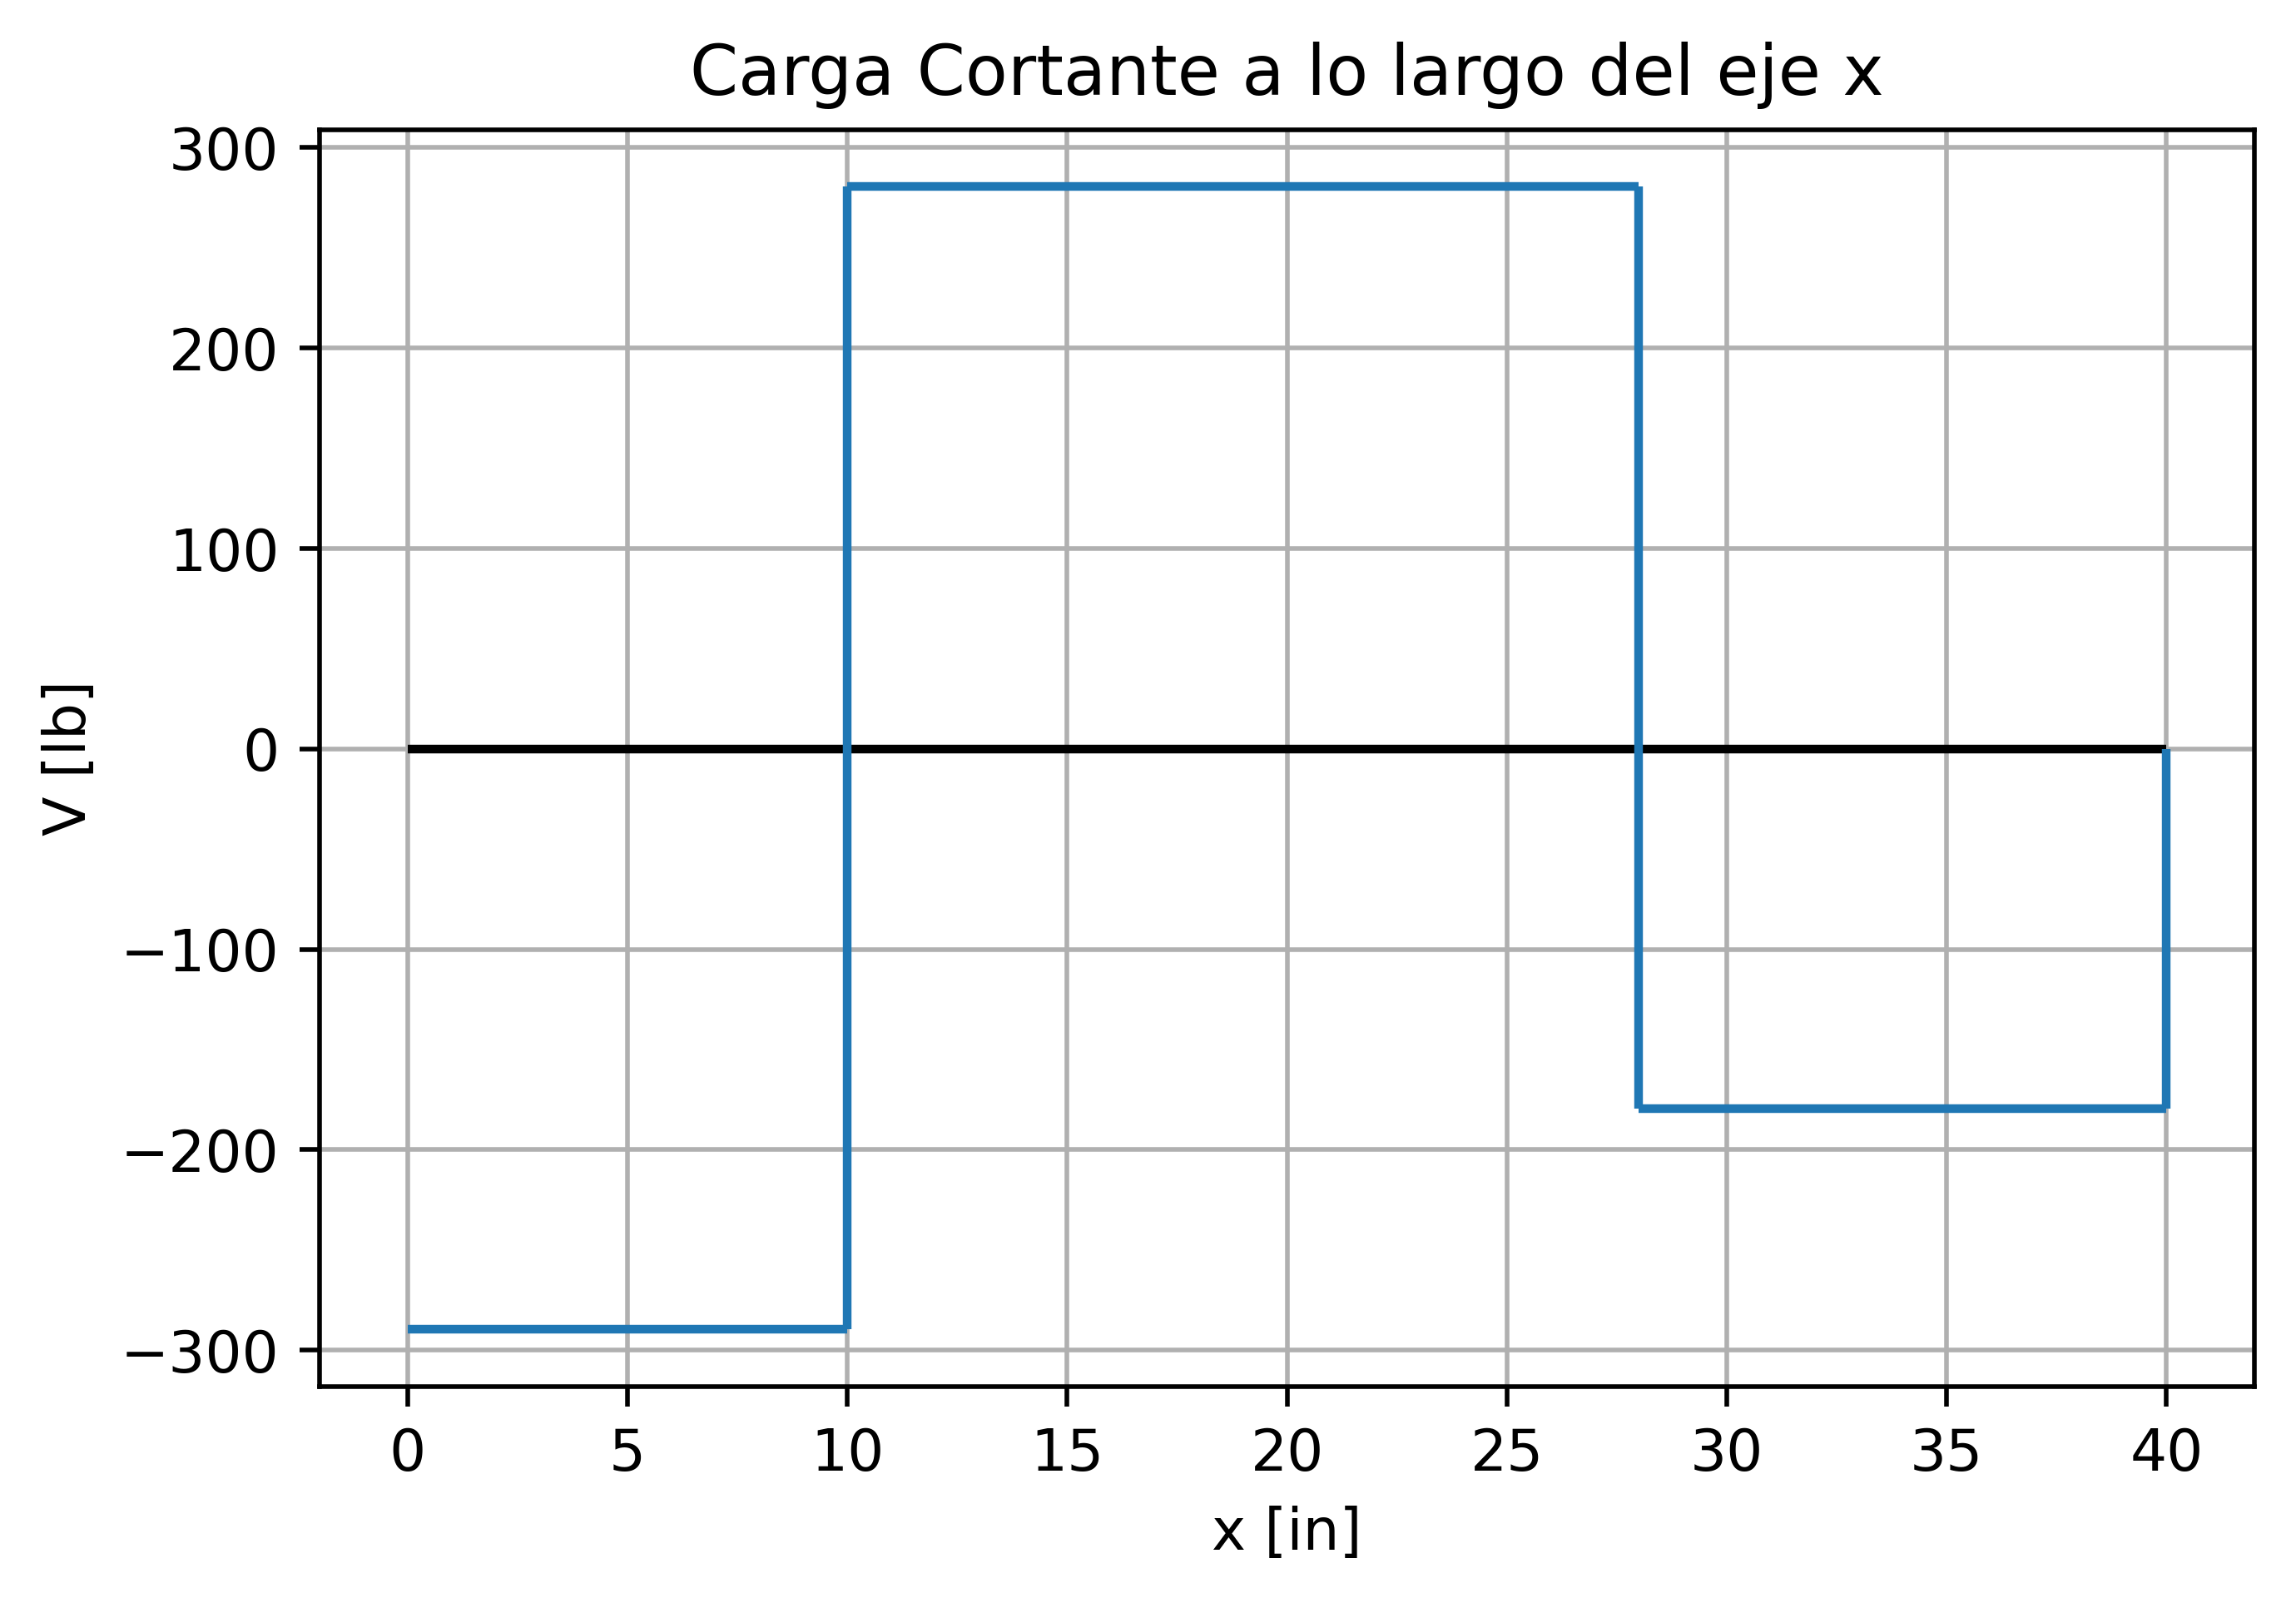

In [4]:
# Gráficas

import matplotlib.pyplot as plt
import numpy as np 
x1 = np.linspace(0,10,50)
x2 = np.linspace(10,28,50)
x3 = np.linspace(28,40,50)

plt.figure(dpi=500)
plt.grid(True)
plt.hlines(0,0,40,'k',)
plt.xlabel('x [in]')
plt.ylabel('V [lb]')
plt.title('Carga Cortante a lo largo del eje x')
plt.hlines(float(sol[1]),0,10) # Primer Tramo

plt.vlines(10,float(sol[1]),float(sol[1])+Ta)

plt.hlines(float(sol[1])+Ta,10,28) # Segundo Tramo

plt.vlines(28,float(sol[1])+Ta - 1.15*float(sol[0]),float(sol[1])+Ta )

plt.hlines(float(sol[1])+Ta - 1.15*float(sol[0]),28,40) # Tercer Tramo
plt.vlines(40,float(sol[1])+Ta - 1.15*float(sol[0]),float(sol[1])+Ta - 1.15*float(sol[0])+float(sol[2]))
plt.show()



In [5]:
# Diagrama de Momentos 

# Pendientes de las funciones de momento 
p1 = float(sol[1])
p2 = float(sol[1])+Ta
p3 = float(sol[1])+Ta - 1.15*float(sol[0])

# Funciones de momento

m1 = lambda x : p1*x
m2 = lambda x : p2*(x-10) + m1(10)
m3 = lambda x : p3*(x-40)

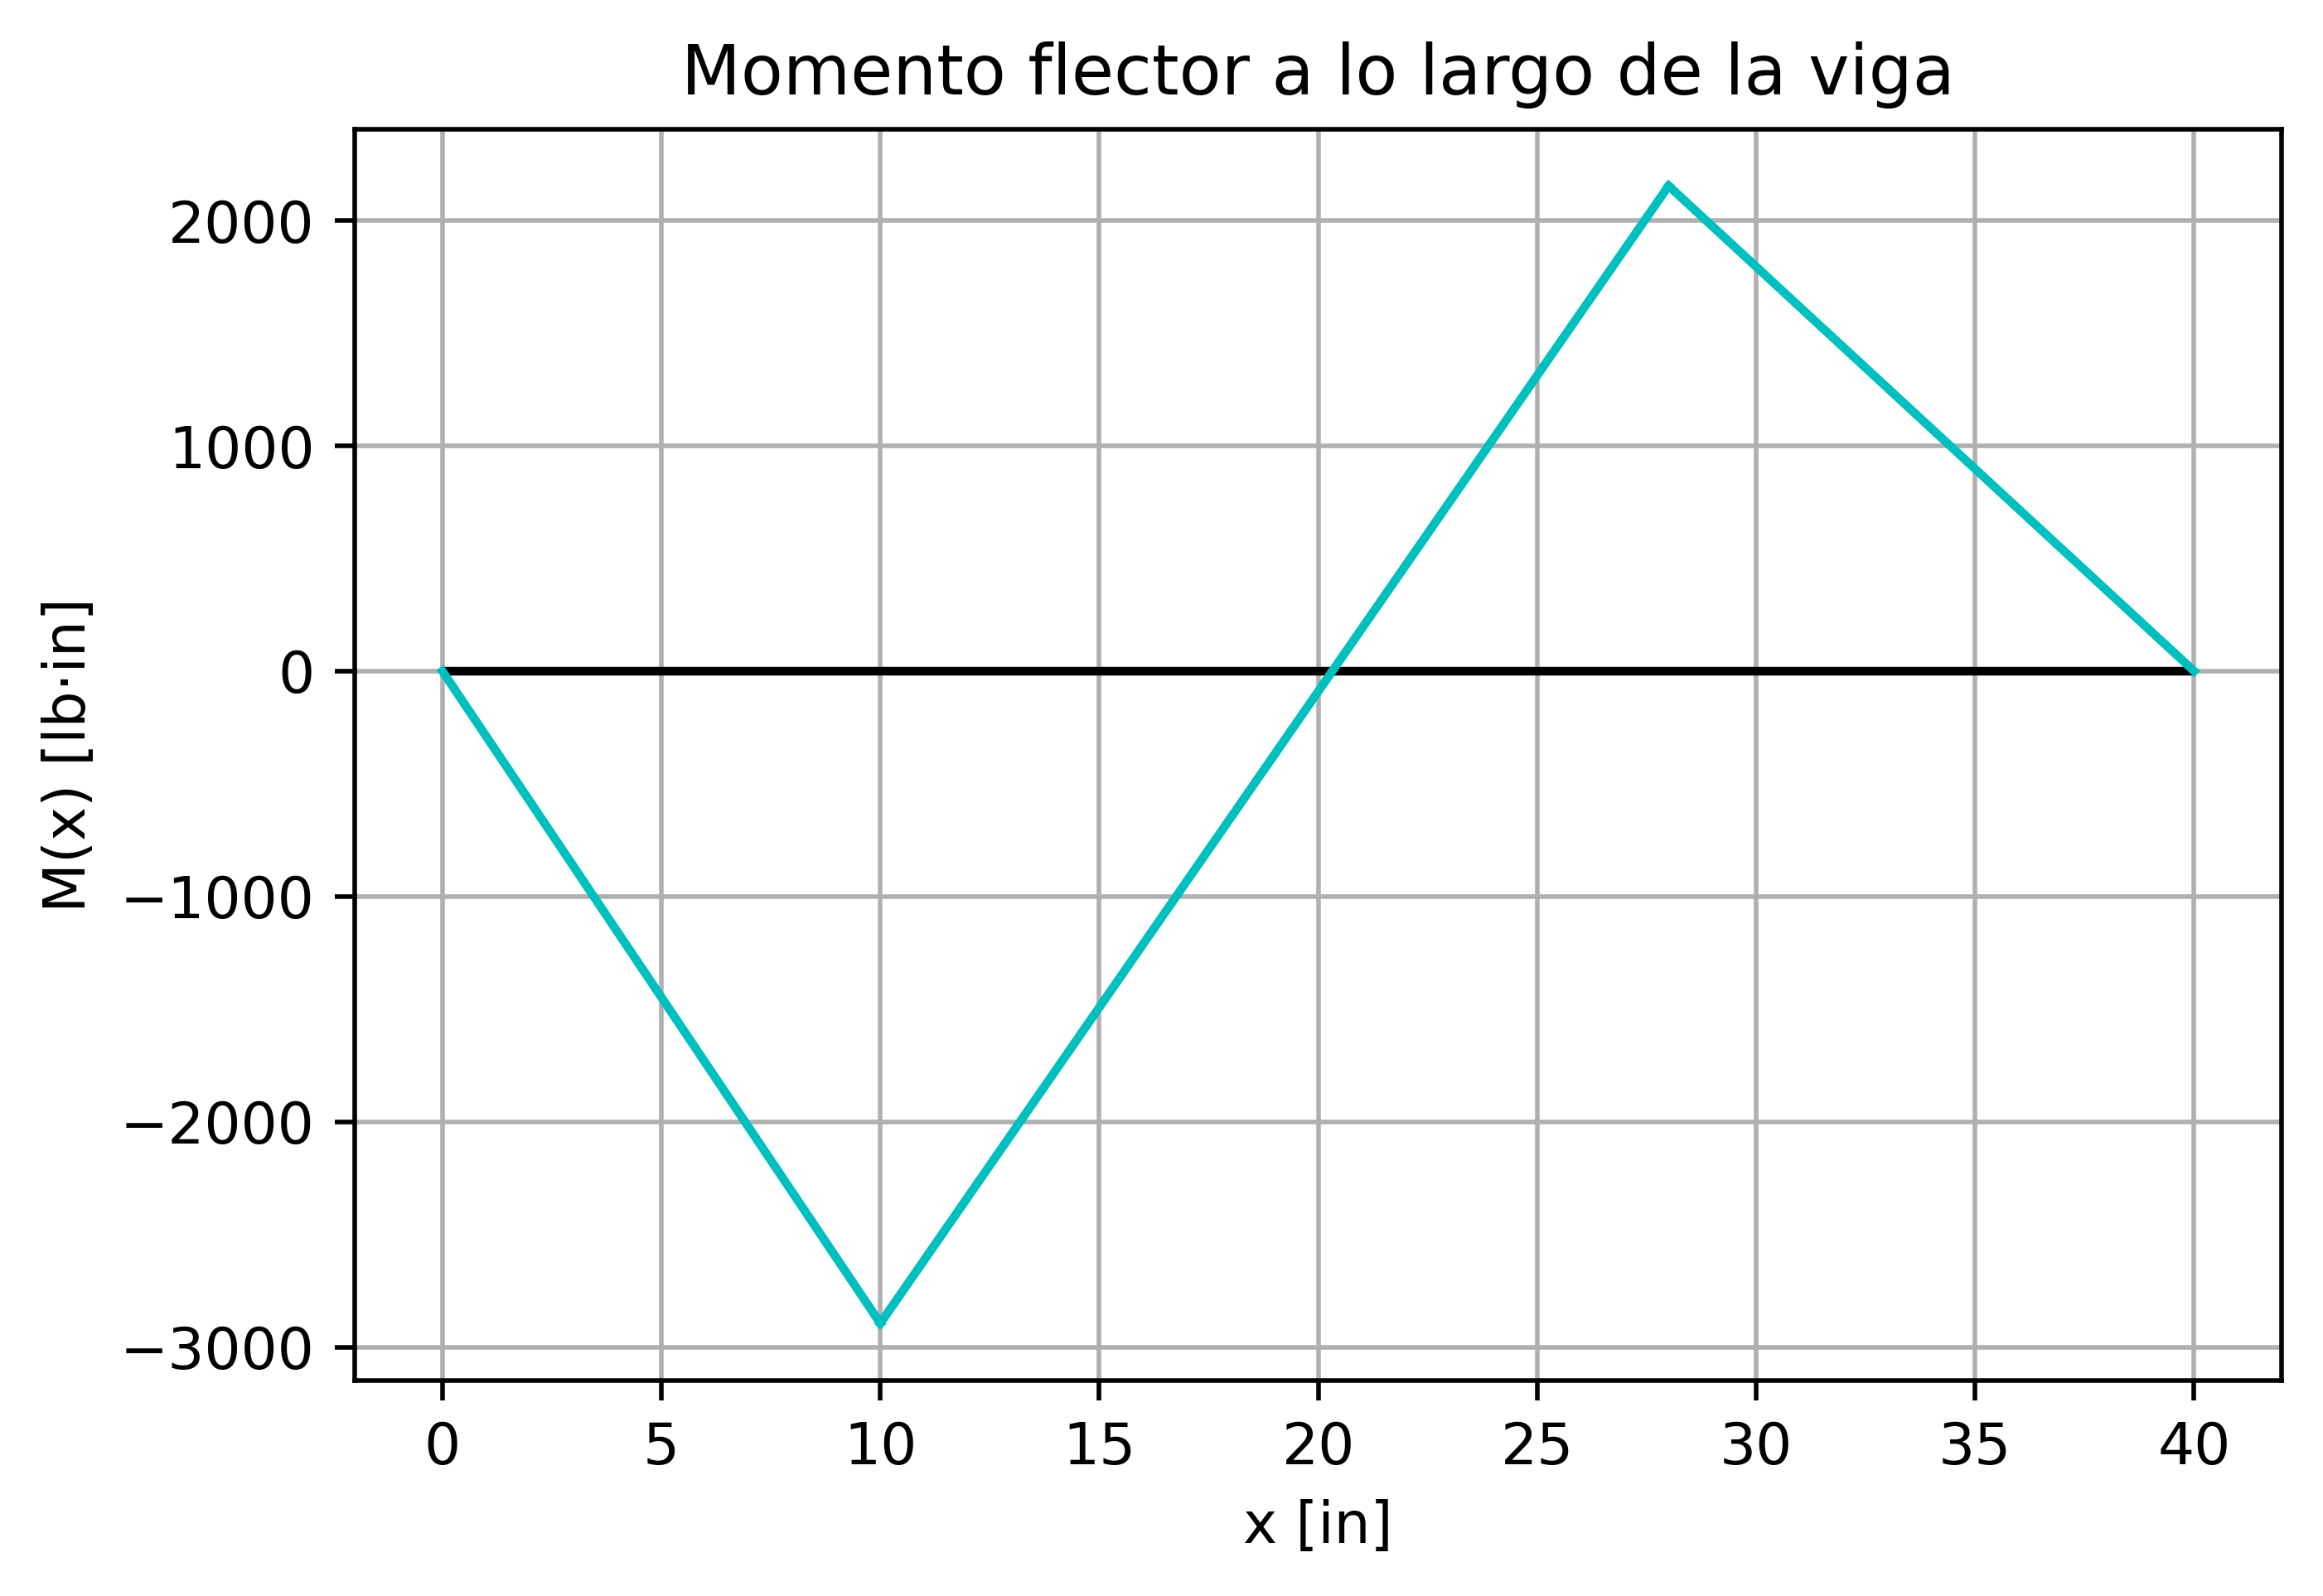

In [6]:
# Gráfica de momento
plt.figure(dpi=500)
plt.grid(True)
plt.xlabel('x [in]')
plt.ylabel('M(x) [lb·in]')
plt.title('Momento flector a lo largo de la viga')
plt.hlines(0,0,40,'k')
plt.plot(x1,m1(x1),'c')
plt.plot(x2,m2(x2),'c')
plt.plot(x3,m3(x3),'c')
plt.show()


*Determinación de esfuerzos máximos de torsión y cortante*

El esfuerzo normal máximo está dado por la expresión:
\begin{equation}
    \sigma_{max} = \frac{ M_{max}c }{I}
\end{equation}
Por otro lado, el esfuerzo de torisón máximo equivale para un cuerpo de sección transversal circular:
\begin{equation}
    \tau_{max} = \frac{Tr}{J}
\end{equation}

De los diagramas de carga cortante y momento flector, se tiene que el punto de mayor estado de esfuerzos es en $x=10$ in. En este punto el diámetro de la viga equivale a $1.25$ in porque es justo después de la polea.

A continuación se calcularan los valores de esfuerzos máximos

In [7]:
d = 1.25
I = np.pi*(d**4)/64
J = np.pi*(d**4)/32
T = 425 * 2
sigma_x = (m1(10)* 0.5*d / I)/1000 #recordar que en este estado de esfuerzos solo tenemos componente x, dividido en 1000 para que esté en ksi
A = np.pi*(4**2)
tau = (T*0.5*d/J)/1000

print('Los esfuerzos máximos, normal y torsional cortante son respectivamente',sigma_x,tau,'Ksi')

Los esfuerzos máximos, normal y torsional cortante son respectivamente -15.097972662305981 2.216455399474971 Ksi


*Calculo de los valores de esfuerzos principales y cortante máximo*

Se importa mi módulo *stressTransformations.py* (encontrado en https://github.com/rafinhaBH/DisenhoImec ) con el fin de encontrar los valores necesarios para el ejercicio. 

In [1]:
import stressTransformations as st

tau_max = st.TauMax(sigma_x,0,tau)
principales = st.SigmaPr(sigma_x,0,tau)

print('El esfuerzo cortante máximo es de',tau_max,'ksi')
print('             ')
print('Los esfuerzos principales son',principales,'ksi')

NameError: name 'sigma_x' is not defined

# Funciones de Singularidad

**Primera Configuración**

Se tienen dos ecuaciones para encontrar las dos reacciones:

* $\sum F_y = 0$:
\begin{equation}
    0 = R_1 + R_2 - 6
\end{equation}

* $\sum M_x = 0$:
\begin{equation}
    0 = -2.4 + 2.2 R_2 - 12.8
\end{equation}

A continuación se encuentran los valores de las reacciones:

In [9]:
r2 = (2.4+12.8)/2.2
r1 = 6-r2
print('Las reacciones son',r1,r2)

Las reacciones son -0.9090909090909092 6.909090909090909


La función de singularidad de carga cortante está dada por:

\begin{equation}
    V(x) = -R1 \langle x \rangle^0 - (2+R1)\langle x-1.2 \rangle^0 + (R2 -R1+2) \langle x-2.2 \rangle^0 -4 \langle x-3.2 \rangle^0
\end{equation}

El momento está dado por:

\begin{equation}
    M(x) = -R1 \langle x \rangle^1 - 2\langle x-1.2 \rangle^1 + R2 \langle x-2.2 \rangle^1 -4 \langle x-3.2 \rangle^1
\end{equation}

**Segunda Configuración**

La fuerza de reaccion en el sistema se encuentra con $\sum F_x =0$:
\begin{equation}
    R_y = 500+40*6
\end{equation}
El momento por viga empotrada se da gracias a $\sum M_o = 0$:
\begin{equation}
    M_o = 500(8) + 40(6)(17)
\end{equation}

In [10]:
R_y = 500+40*6
M = 500*8 + 40*6*17
print('Las reacciones de fuerza y momento son respectivamente, en lb y lb·in',R_y,'y',M)

Las reacciones de fuerza y momento son respectivamente, en lb y lb·in 740 y 8080


La función de carga cortante es:
\begin{equation}
    V(x) = R_y \langle x \rangle^0  -M_o \langle x \rangle^{-1} - 500 \langle x-8 \rangle^0 - 40 \langle x-14 \rangle^1
\end{equation}

La función de momento flector se da con:

\begin{equation}
    M(x) = R_y \langle x \rangle^1  -M_o \langle x \rangle^{0} - 500 \langle x-8 \rangle^1 - 20 \langle x-14 \rangle^2
\end{equation}

# Circulos de Mohr

In [6]:
import stressTransformations as st 
st.SigmaPr(-80,-30,20)
st.TauMax(-80,-30,20)
st.thPr(-80,-30,-20)

19.329904127045047

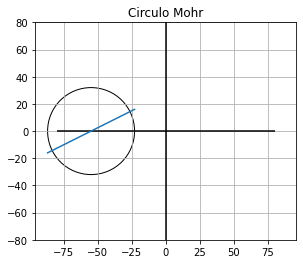

In [11]:
sx , sy, t = -80, -30, 20
st.mohr(-80,-30,20)

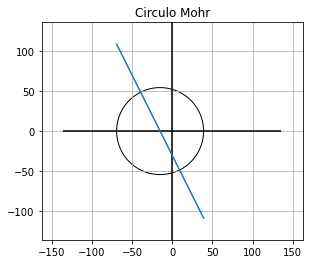

In [12]:
st.mohr(30,-60,30)

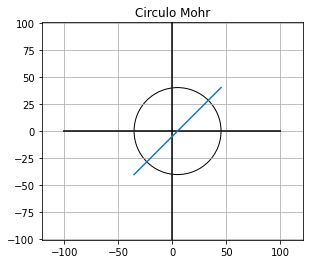

In [13]:
st.mohr(40,-30,-20)

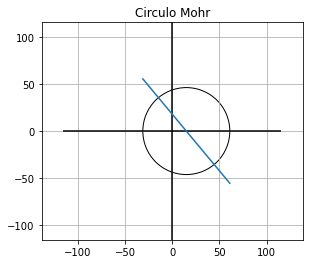

In [14]:
st.mohr(50,-20,30)

# Sistema de eje y coupler

El esfuerzo cortante total sobre el sistema está dado por:
\begin{equation}
    \tau_{total} = \frac{T R_1}{J}
\end{equation}
Con el radio total de $200$ mm. Entonces asumiendo que cada torque se divide en los diez tornillos, se va a evualuar si se cumple con el esfuerzo permisible. Por otro lado, el torque $T$ se encuentra despejando de la potencia:
\begin{equation}
    T=P/\omega
\end{equation}

In [15]:
d=0.02
P = 50000
w = 1000*2*np.pi/60
T = P/w
T_bolt = T/10
tau_bolt = 16*T/(np.pi*(d**3))
tau_bolt = tau_bolt/1000000
if tau_bolt > 100:
    print('Se supera el esfuerzo permisible')
else:
    print('No se supera el esfuerzo permisible')


Se supera el esfuerzo permisible
